In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'AppleGothic'

## 데이터 로드

In [2]:
df = pd.read_csv('data/서울시 공공자전거 이용현황.csv', parse_dates=['기준일자'])
df.head()

,대여소위치,대여소명,기준일자,대여건수,반납건수
0,동작구,2067. LG전자 베스트샾 대리점 앞,2018-11-30,16,11
1,양천구,726. 목동3단지 시내버스정류장,2018-11-30,30,27
2,양천구,725. 양강중학교앞 교차로,2018-11-30,14,5
3,양천구,724. 계남공원 입구 주출입구 좌측,2018-11-30,3,0
4,양천구,723. SBS방송국,2018-11-30,38,44


In [3]:
df.tail()

,대여소위치,대여소명,기준일자,대여건수,반납건수
721656,마포구,104. 합정역 1번출구 앞,2015-09-19,11,10
721657,마포구,103. 망원역 2번출구 앞,2015-09-19,18,19
721658,마포구,102. 망원역 1번출구 앞,2015-09-19,13,14
721659,마포구,101. (구)합정동 주민센터,2015-09-19,5,8
721660,그룹명 없음,대여소명 없음,2015-09-19,0,17


In [4]:
df.shape

(721661, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721661 entries, 0 to 721660
Data columns (total 5 columns):
대여소위치    721661 non-null object
대여소명     721661 non-null object
기준일자     721661 non-null datetime64[ns]
대여건수     721661 non-null int64
반납건수     721661 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 27.5+ MB


### 결측치 확인

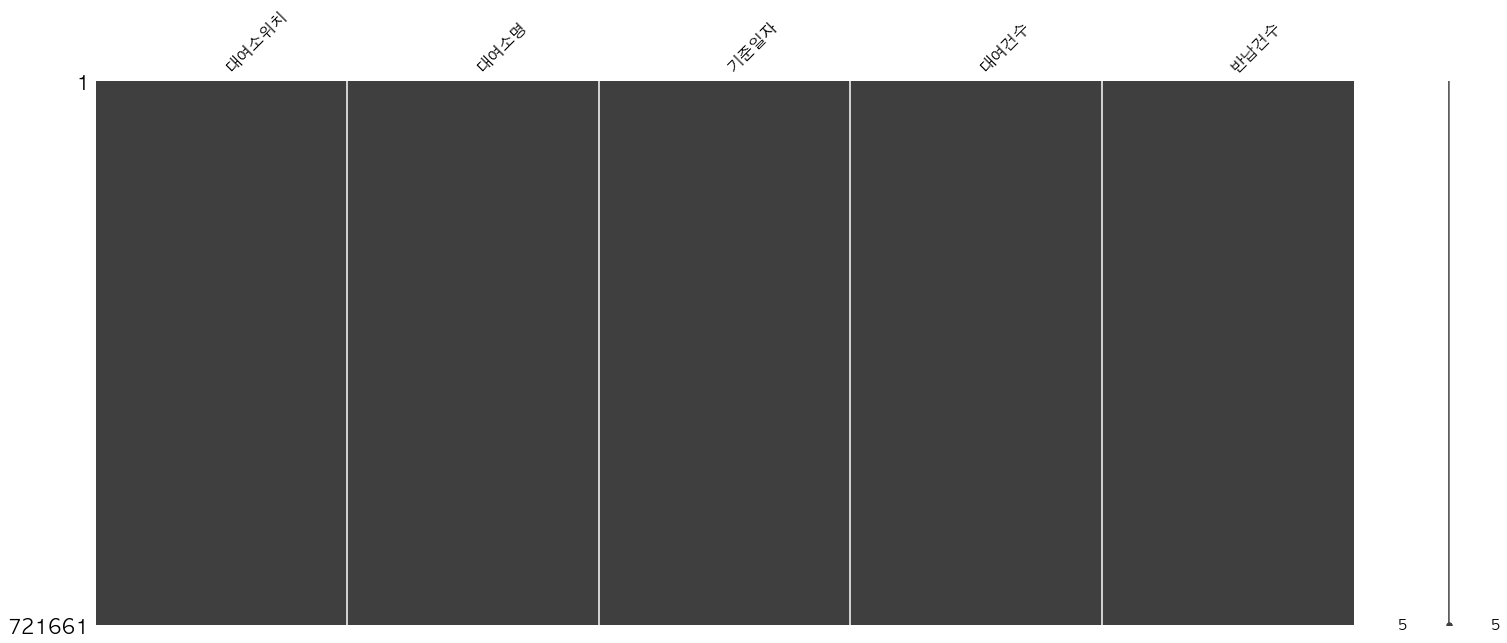

In [6]:
import missingno as msno

msno.matrix(df)
plt.show()

결측치 없이 깔끔함.

### 시간 피처 추가

In [7]:
df['년'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month
df['일'] = df['기준일자'].dt.day

### 특정 피처 값들 확인

불필요한 피처값 제거. 

In [8]:
df['대여소위치'].unique()

array(['동작구', '양천구', '마포구', '광진구', '송파구', '종로구', '중구', '관악구', '강서구',
       '노원구', '성동구', '강남구', '서초구', '강북구', '성북구', '용산구', '중랑구', '구로구',
       '도봉구', '강동구', '영등포구', '금천구', '서대문구', '은평구', '동대문구', '그룹명 없음'],
      dtype=object)

In [9]:
df = df[df['대여소위치'] != '그룹명 없음']

In [10]:
df['대여소위치'].unique()

array(['동작구', '양천구', '마포구', '광진구', '송파구', '종로구', '중구', '관악구', '강서구',
       '노원구', '성동구', '강남구', '서초구', '강북구', '성북구', '용산구', '중랑구', '구로구',
       '도봉구', '강동구', '영등포구', '금천구', '서대문구', '은평구', '동대문구'], dtype=object)

In [11]:
df['대여소명'].nunique()

1554

처리하기 쉽게 데이터타입 바꿔주기

In [12]:
df['대여소위치'] = df['대여소위치'].astype('category')
df['대여소명'] = df['대여소명'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720089 entries, 0 to 721659
Data columns (total 8 columns):
대여소위치    720089 non-null category
대여소명     720089 non-null category
기준일자     720089 non-null datetime64[ns]
대여건수     720089 non-null int64
반납건수     720089 non-null int64
년        720089 non-null int64
월        720089 non-null int64
일        720089 non-null int64
dtypes: category(2), datetime64[ns](1), int64(5)
memory usage: 40.6 MB


---

## 데이터 EDA

### 연, 월간 사용량 (대여, 반납) 알아보기

In [13]:
df.head()

,대여소위치,대여소명,기준일자,대여건수,반납건수,년,월,일
0,동작구,2067. LG전자 베스트샾 대리점 앞,2018-11-30,16,11,2018,11,30
1,양천구,726. 목동3단지 시내버스정류장,2018-11-30,30,27,2018,11,30
2,양천구,725. 양강중학교앞 교차로,2018-11-30,14,5,2018,11,30
3,양천구,724. 계남공원 입구 주출입구 좌측,2018-11-30,3,0,2018,11,30
4,양천구,723. SBS방송국,2018-11-30,38,44,2018,11,30


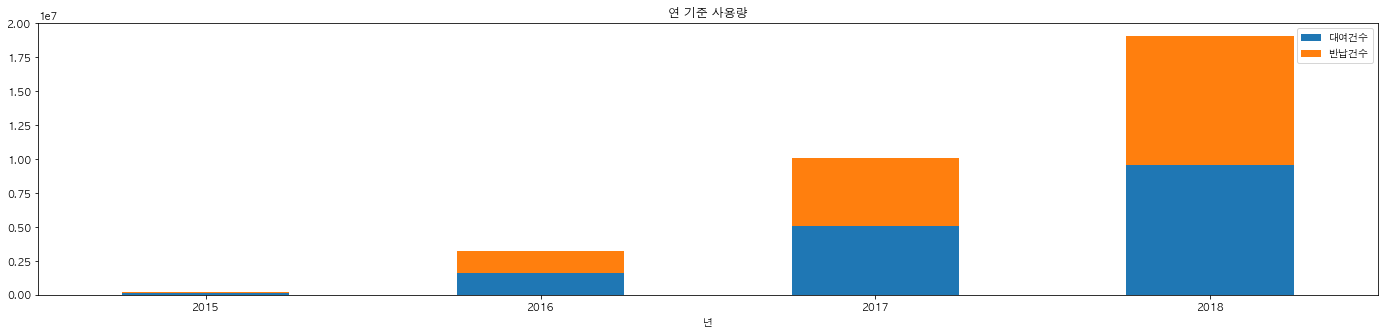

In [14]:
year = df.groupby(['년'])[['대여건수', '반납건수']].agg('sum')
year.plot(kind='bar', figsize=(24, 5), rot=0, stacked=True, title="연 기준 사용량")
plt.show()

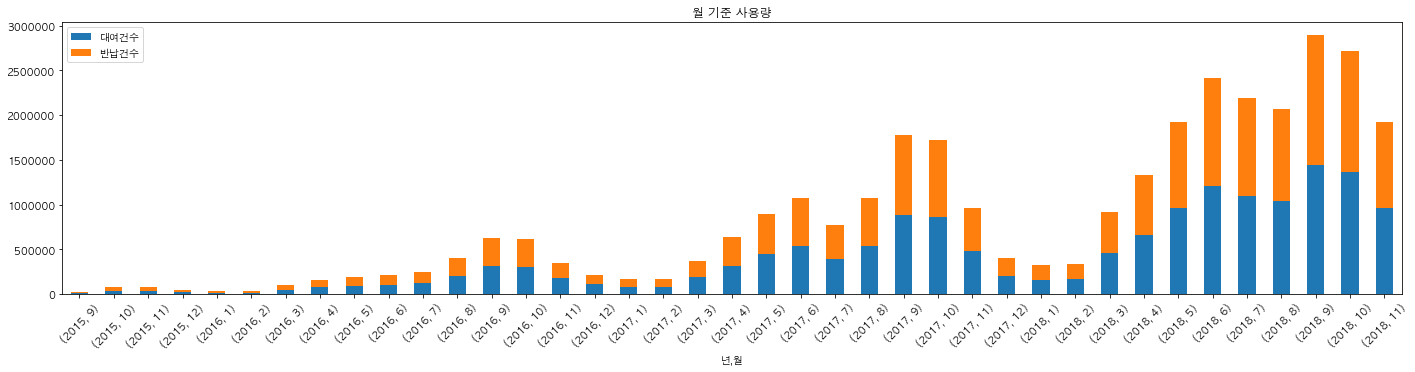

In [15]:
month = df.groupby(['년', '월'])[['대여건수', '반납건수']].agg('sum')
month.plot(kind='bar', figsize=(24, 5), rot=45, stacked=True, title="월 기준 사용량")
plt.show()

확실히, 시간이 지날수록 많이 늘어난다.  
여름 전후인 5월, 9, 10월에 피크를 찍는 것을 알 수 있음.

가장 피크타임대인 9월 기준으로 해마다 대여량 증가를 살펴보면,

In [16]:
september = month.loc[[(2015, 9), (2016, 9), (2017, 9), (2018, 9)]]['대여건수']
increasing_ratio = []
for i, year in enumerate(september):
    if i == 0:
        continue
    increasing_ratio.append((september[i] - september[i-1]) / september[i-1] * 100)
increasing_ratio

[2615.0422632396067, 182.681347726363, 62.71984536372116]

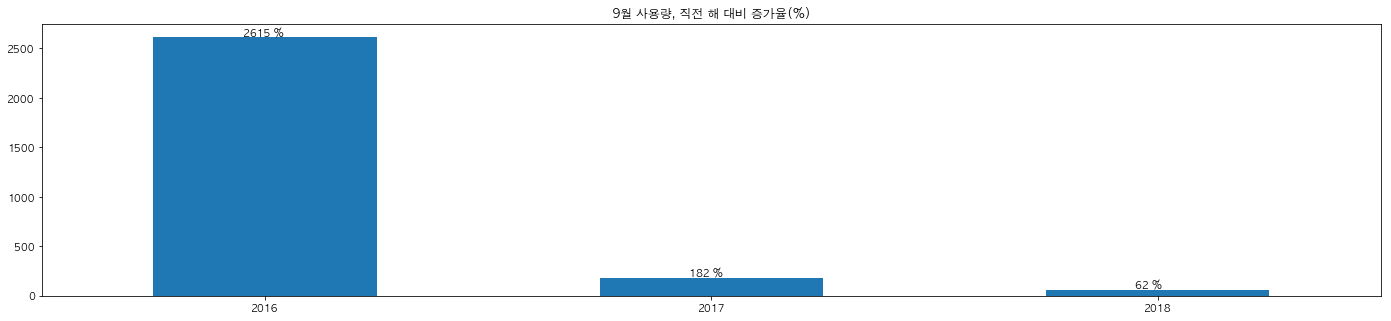

In [17]:
ax = pd.Series(increasing_ratio,
         index=["2016", "2017", "2018"]).plot(kind='bar', figsize=(24, 5), rot=0, title="9월 사용량, 직전 해 대비 증가율(%)")
for p in ax.patches:
    ax.annotate("%d %%"%p.get_height(), (p.get_x()+0.2, p.get_height()))
plt.show()

### 각 지역별로 사용량 (대여, 반납) 알아보기

In [18]:
sum_of_use = df.groupby('대여소위치')[['대여건수', '반납건수']].sum()
sum_of_use.head()

,대여건수,반납건수
대여소위치,,
강남구,531907,490723
강동구,388399,404836
강북구,191176,194769
강서구,474419,501111
관악구,454347,454576


In [19]:
df[['대여건수', '반납건수']].corr()

,대여건수,반납건수
대여건수,1.000000,0.987565
반납건수,0.987565,1.000000


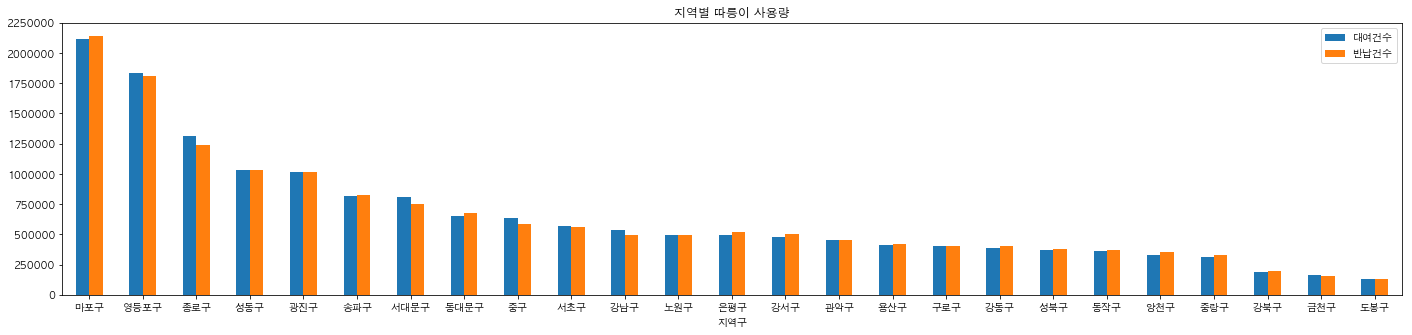

In [20]:
sum_of_use.sort_values('대여건수', ascending=False, inplace=True)
sum_of_use.plot(kind='bar', figsize=(24, 5), title="지역별 따릉이 사용량", rot=0)
plt.xlabel("지역구")
plt.show()

#### [해석]
- 1. 대여, 반납건수가 비슷비슷함. (상관 계수가 0.99정도)
- 2. 사용량이 많은 지역과 적은 지역 차이가 매우 크다. 왜 그럴까?

일단 지도로 그려보자

In [21]:
import json
import folium

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

bike_map = folium.Map(location=[37.541, 126.986], zoom_start=10.8)
folium.Choropleth(geo_data=geo_str,
                  data=sum_of_use,
                  columns=[sum_of_use.index, '대여건수'],
                  key_on='feature.properties.SIG_KOR_NM', 
                  fill_color='Blues').add_to(bike_map)
bike_map

저번 노트 [자전거 대여소 EDA] 를 생각해보면,  
**대여소가 많은 곳이 이용률이 높을 듯 한데**, 예를 들어,  
강남, 서초, 송파 위주로 이용률이 높아야 할텐데, 왜 그렇지 않고, 마포, 영등포가 더 높을까?
  
혹시, 영등포, 마포부터 먼저 설치되고, 강남, 송파 등에는 뒤늦게 세워지면서, 먼저 설치되어있던, 마포, 영등포가 3년간 이용량이 더 높은게 아닐까?  
이를 위해, 데이터 전체의 대표값을 보는게 아니라, **시간대별로 대여소 및 사용량을 알아봐야 할 듯**하다!

### 가장 사용량이 많았던 대여소 top 10.

In [22]:
sum_of_use = df.groupby('대여소명')[['대여건수', '반납건수']].sum()
sum_of_use.head()

,대여건수,반납건수
대여소명,,
1001. 광진교 남단 사거리(디지털프라자앞),17285,17594
1002. 해공공원(천호동),9674,11500
1003. 해공도서관앞,8589,8524
1004. 삼성광나루아파트 버스정류장,9775,13962
1006. 롯데캐슬 115동앞,7312,5763


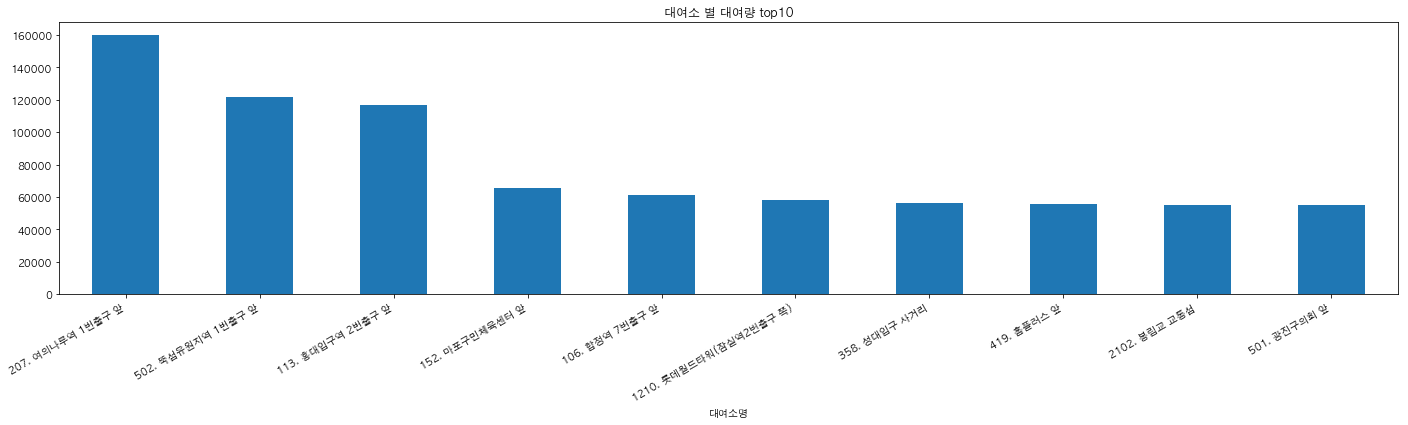

In [23]:
topn = 10

sum_of_use.sort_values('대여건수', ascending=False, inplace=True)
sum_of_use[:topn]['대여건수'].plot(kind='bar', figsize=(24, 5), title="대여소 별 대여량 top%d"%topn, rot=30)
plt.xticks(ha='right')
plt.show()

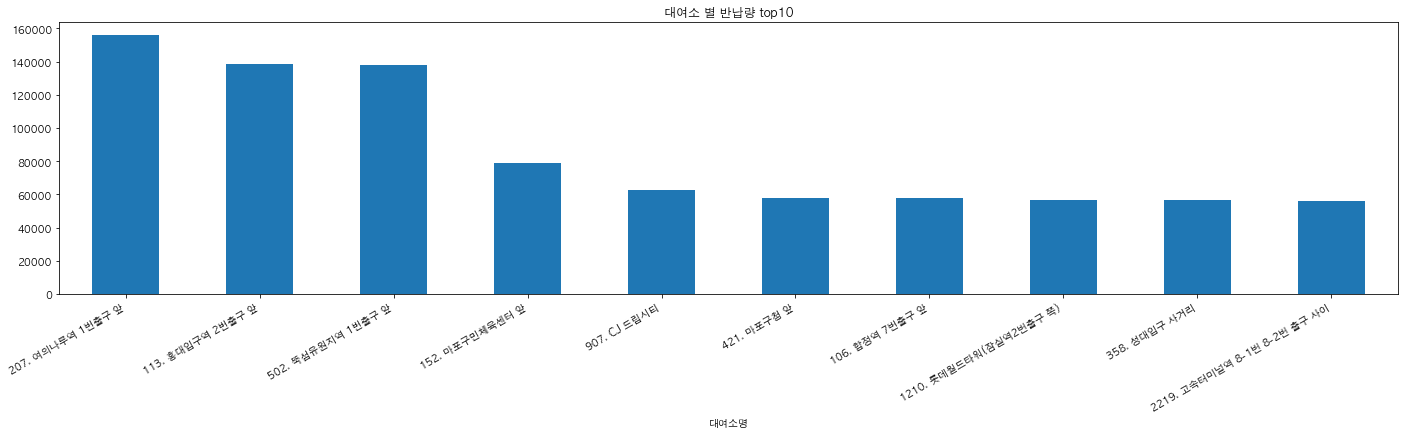

In [24]:
sum_of_use.sort_values('반납건수', ascending=False, inplace=True)

sum_of_use[:topn]['반납건수'].plot(kind='bar', figsize=(24, 5), title="대여소 별 반납량 top%d"%topn, rot=30)
plt.xticks(ha='right')
plt.show()

#### [해석]
- 1. 대부분, 영등포, 마포쪽임.

## 월별로 살펴보기

### 지역별 대여소 갯수 증가량 보기 (추정)

데이터를 보면, 일별로 각 대여소의 대여건수, 반납건수 량이 나오는데,  
이를 기준으로, 각 지역별 대여소의 개수를 추정해봄.

In [25]:
pvt_num_rental = df.pivot_table(index=['대여소위치'], columns=['년', '월'], values='대여소명', aggfunc='nunique').fillna(0)
pvt_num_rental.head()

년     2015                2016                           ...  2018        \
월       9    10   11   12   1    2    3    4    5    6   ...    2     3    
대여소위치                                                    ...               
강남구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  65.0  70.0   
강동구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  42.0  42.0   
강북구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  28.0  28.0   
강서구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  39.0  39.0   
관악구    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  34.0  42.0   

년                                                      
월        4     5     6     7     8     9     10    11  
대여소위치                                                  
강남구    78.0  77.0  78.0  79.0  80.0  82.0  93.0  96.0  
강동구    47.0  47.0  47.0  47.0  47.0  57.0  57.0  57.0  
강북구    35.0  35.0  35.0  36.0  36.0  36.0  37.0  37.0  
강서구    55.0  55.0  55.0  55.0  55.0  55.0  69.0  78.0  
관악구    45.0  46.0  46.0  46.0  46.0  46.0  49.0  51.0  

[5 rows x 39 columns]

In [26]:
pvt_num_rental.sort_values(by=[(2015, 9), (2015, 10)], ascending=False, inplace=True)

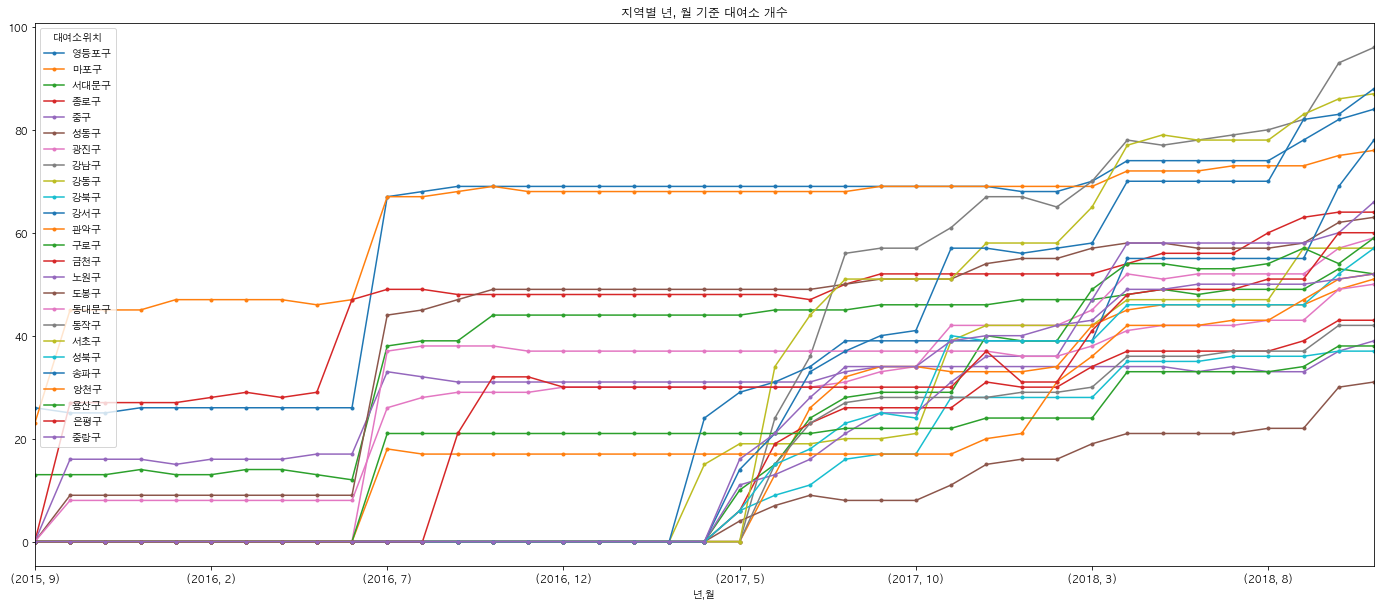

In [27]:
pvt_num_rental.T.plot(style='.-', figsize=(24, 10), title="지역별 년, 월 기준 대여소 개수")
plt.show()

위 같이 보면... 보기 너무 힘드니, 히트맵으로 그려보자.

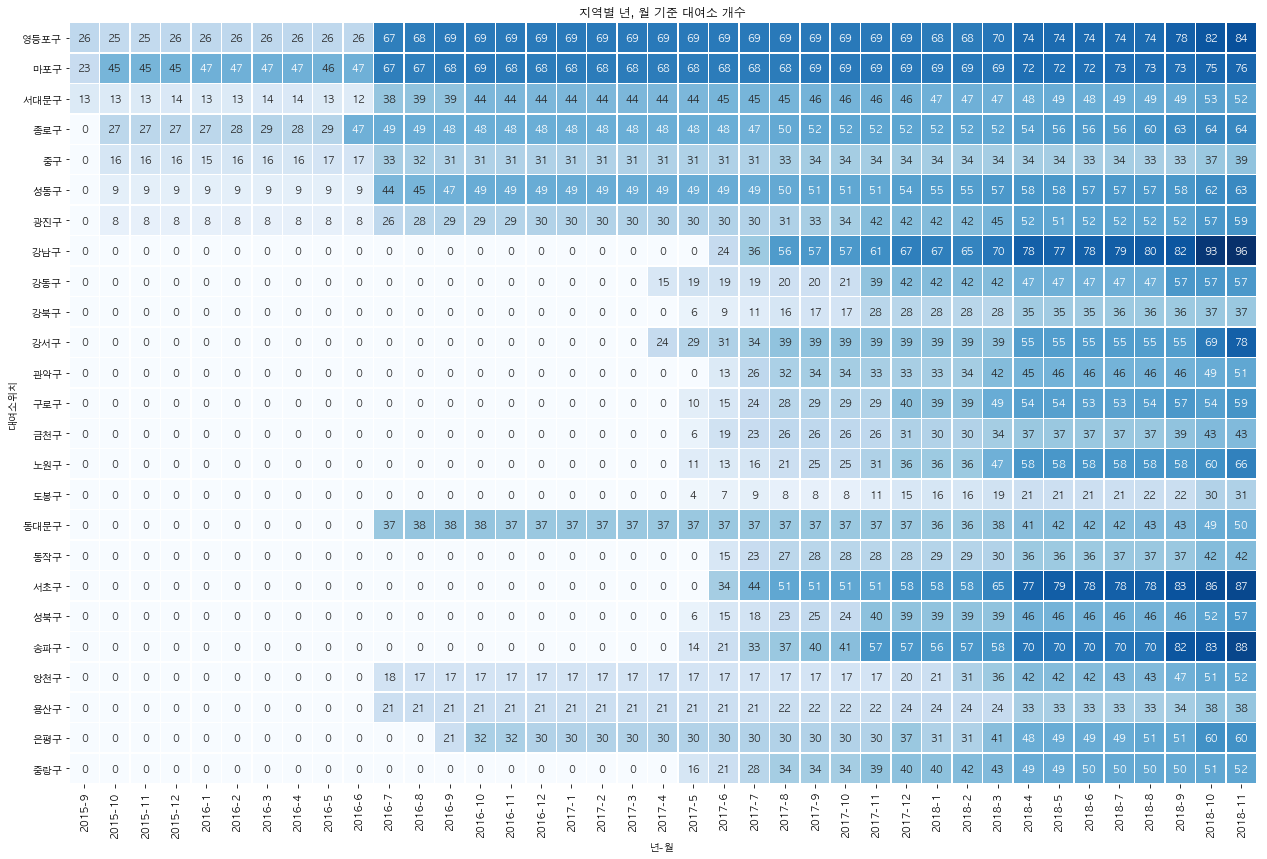

In [28]:
plt.figure(figsize=(24, 14))
sns.heatmap(pvt_num_rental, square=True, annot=True, cmap='Blues', linewidth=0.5, cbar=False)
plt.title("지역별 년, 월 기준 대여소 개수")
plt.show()

#### [해석]
- 2015.10 이전부터, **영등포, 마포, 서대문**을 중심으로 대여소가 선행적으로 설치되었음.
- 2015.10 에 종로, 중구, 성동, 광진구에 일부 대여소가 처음으로 설치되었고, 마포에 이전량의 2배를 늘림.
- 2016.7, 2017.5 을 기점으로, 기존 지역 및 새로운 지역들에 대여소가 설치됨.
- 그 이후로, 계속해서 대여소를 늘어나고, 특히 **강남, 서초, 송파**에 집중적으로 대여소들이 추가됨.

대여소 증가의 총량을 보면

#### 월, 연간 대여소량

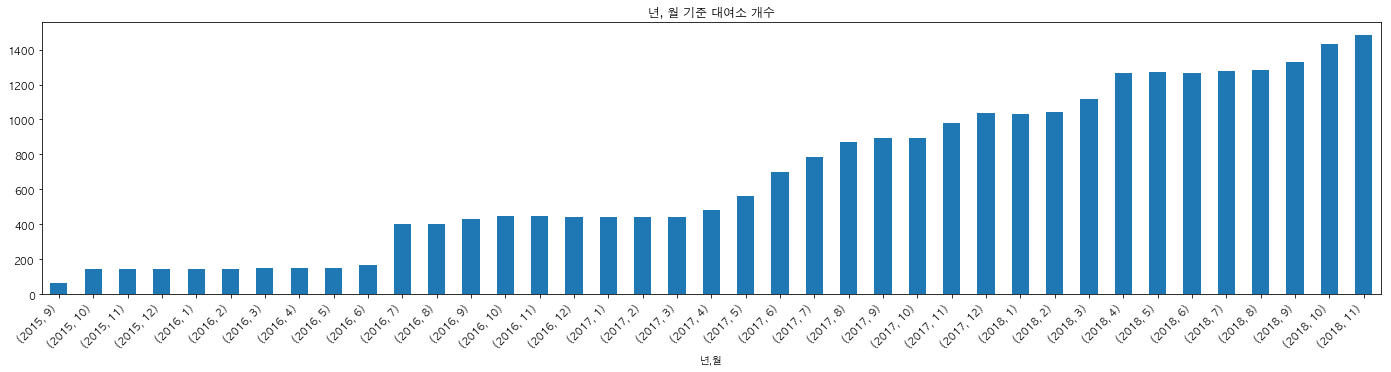

In [29]:
pvt_num_rental.sum(axis=0).plot(kind='bar', figsize=(24, 5), rot=45, title="년, 월 기준 대여소 개수")
plt.xticks(ha='right')
plt.show()

연별로 보면,

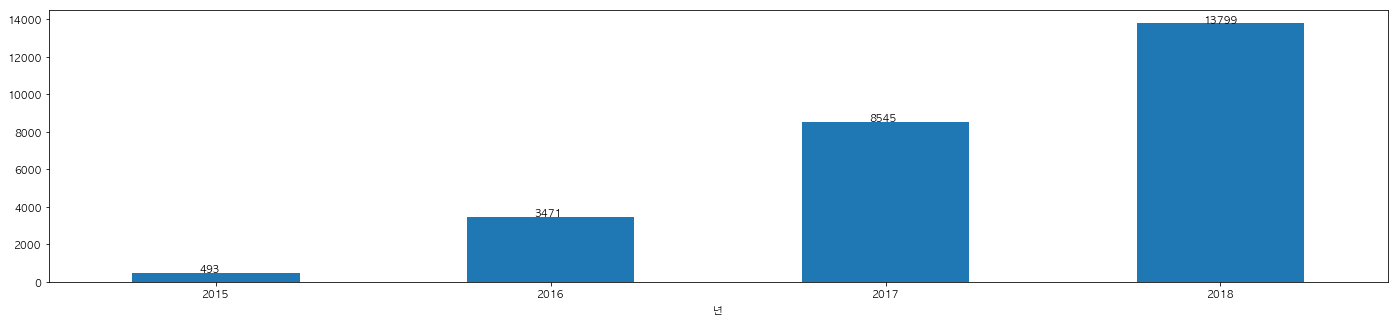

In [30]:
ax = pvt_num_rental.sum(axis=1, level=0).sum(axis=0).plot(kind='bar', figsize=(24, 5), rot=0)
for p in ax.patches:
    ax.annotate("%d"%p.get_height(), (p.get_x()+0.2, p.get_height()))
plt.show()

#### [해석]
- 15->16 년에 가장 많이 만들고 (전해 대비 약 7배)
- 이후 꾸준히 늘려나가고 있음.

### 지역별 대여소 이용량(대여, 반납) 보기

#### 1. 대여건수

In [31]:
region_index = list(pvt_num_rental.index)

In [32]:
pvt_num_use = df.pivot_table(index=['대여소위치'], columns=['년', '월'], values='대여건수', aggfunc='sum').fillna(0)
pvt_num_use = pvt_num_use.astype('int')
pvt_num_use = pvt_num_use.reindex(index=region_index)
pvt_num_use.head()

년      2015                      2016                                    ...  \
월        9      10     11    12    1     2      3      4      5      6   ...   
대여소위치                                                                    ...   
영등포구   4664   9789   6360  4138  3484  3533  12418  20418  20276  20697  ...   
마포구    4825  15982  13210  8205  6486  5958  16642  26594  32916  36106  ...   
서대문구   2105   4854   3412  1980  1592  1167   3602   5407   6331   7346  ...   
종로구       0   5747   8823  5085  3954  4243   9571  14487  17482  24299  ...   
중구        0   2289   3593  2029  1486  1497   3790   5644   7677   8912  ...   

년       2018                                                              \
월         2      3      4      5       6       7      8       9       10   
대여소위치                                                                      
영등포구   17460  45764  66980  90662  104375   96917  92000  127838  116389   
마포구    20042  52907  69011  92825  109284  100152  94014  128418  116132   
서대문구    8846  22334  28282  37977   46101   42321  39441   49112   46417   
종로구    15816  34980  42337  53100   63232   60110  58272   70272   68326   
중구      7957  17972  21904  26267   31496   29790  27064   34279   34859   

년             
월         11  
대여소위치         
영등포구   79519  
마포구    74520  
서대문구   34482  
종로구    54991  
중구     29525  

[5 rows x 39 columns]

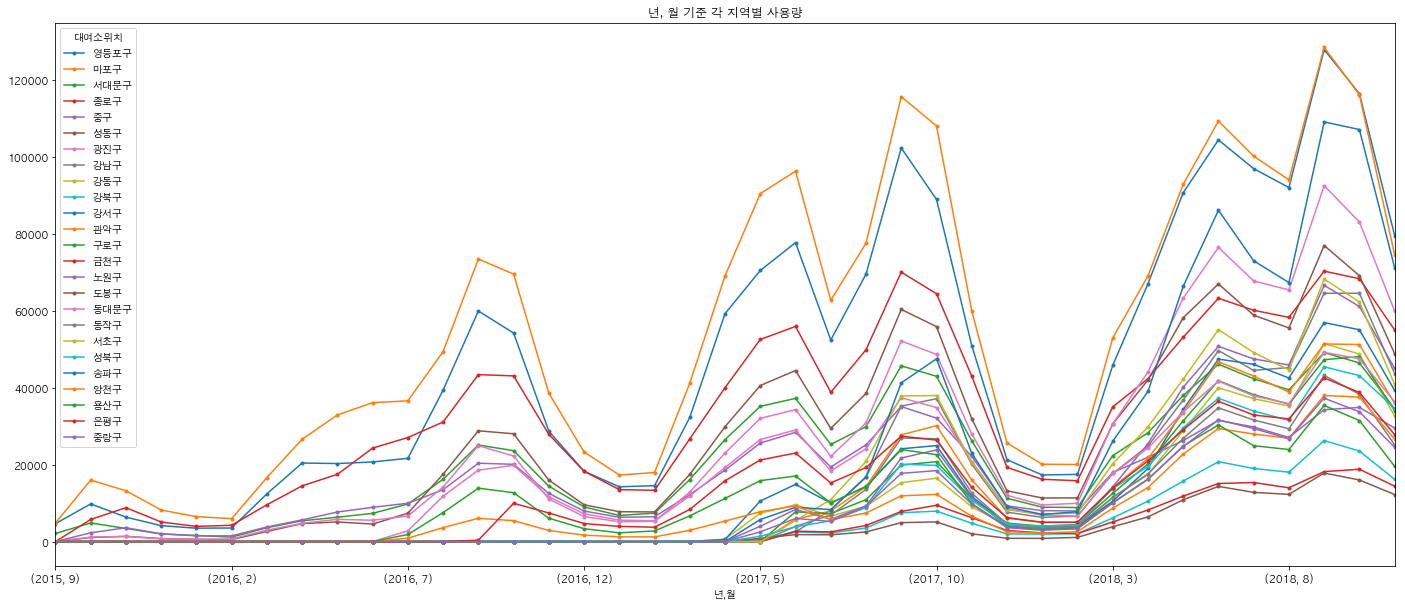

In [33]:
pvt_num_use.T.plot(style='.-', figsize=(24, 10), title="년, 월 기준 각 지역별 사용량")
plt.show()

추세선을 잠시 살펴보면, 어느지역이나, **시간대에 따른 대여건수 패턴**이 비슷한 걸 알 수 있다.

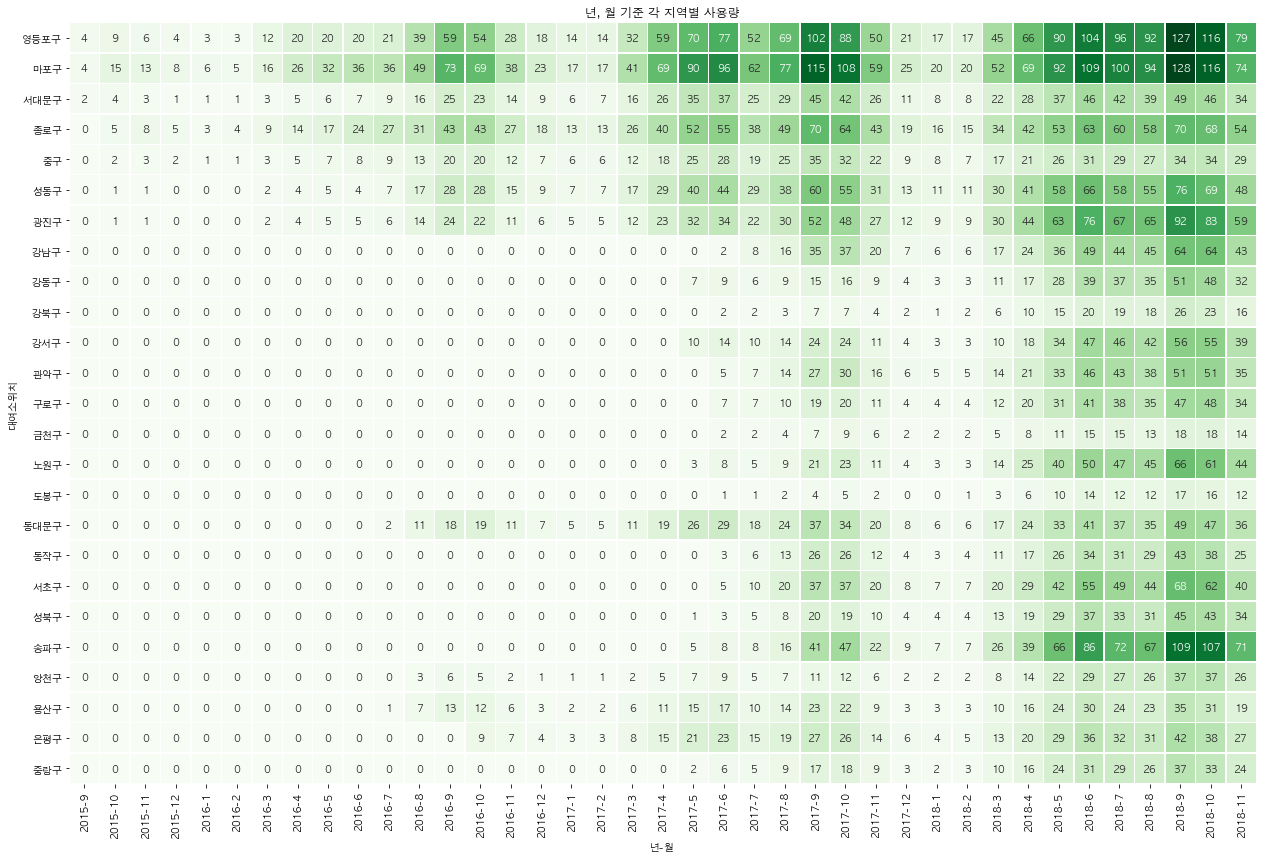

In [34]:
unit = 1000

plt.figure(figsize=(24, 14))
sns.heatmap((pvt_num_use/unit).astype('int'), square=True, cmap='Greens', linewidth=0.5, cbar=False, annot=True, fmt='d')
plt.title("년, 월 기준 각 지역별 사용량")
plt.show()

#### 2. 반납건수

In [35]:
pvt_num_return = df.pivot_table(index=['대여소위치'], columns=['년', '월'], values='반납건수', aggfunc='sum').fillna(0)
pvt_num_return = pvt_num_return.astype('int')
pvt_num_return = pvt_num_return.reindex(index=region_index)
pvt_num_return.head()

년      2015                      2016                                    ...  \
월        9      10     11    12    1     2      3      4      5      6   ...   
대여소위치                                                                    ...   
영등포구   4749   9986   6338  4195  3494  3493  12379  20378  20281  20748  ...   
마포구    4904  16065  13423  8167  6462  6037  16833  26884  33262  36533  ...   
서대문구   1808   4471   3220  1942  1530  1108   3461   5123   6135   7104  ...   
종로구       0   5510   8590  5108  3923  4079   9423  14163  17051  23941  ...   
중구        0   2343   3515  1887  1468  1513   3678   5588   7429   8443  ...   

년       2018                                                                    
월         2      3      4      5       6      7      8       9       10     11  
대여소위치                                                                           
영등포구   17318  45234  65809  89548  102555  94400  90595  127324  115395  78985  
마포구    20988  54356  69919  93571  109618  99988  94159  128084  118134  77357  
서대문구    7964  20633  26272  35344   42952  39572  36621   45970   42213  30661  
종로구    15313  32831  39595  49785   58460  55672  54660   65494   64640  53387  
중구      7684  17026  20466  24528   29013  26167  24128   31758   32298  27724  

[5 rows x 39 columns]

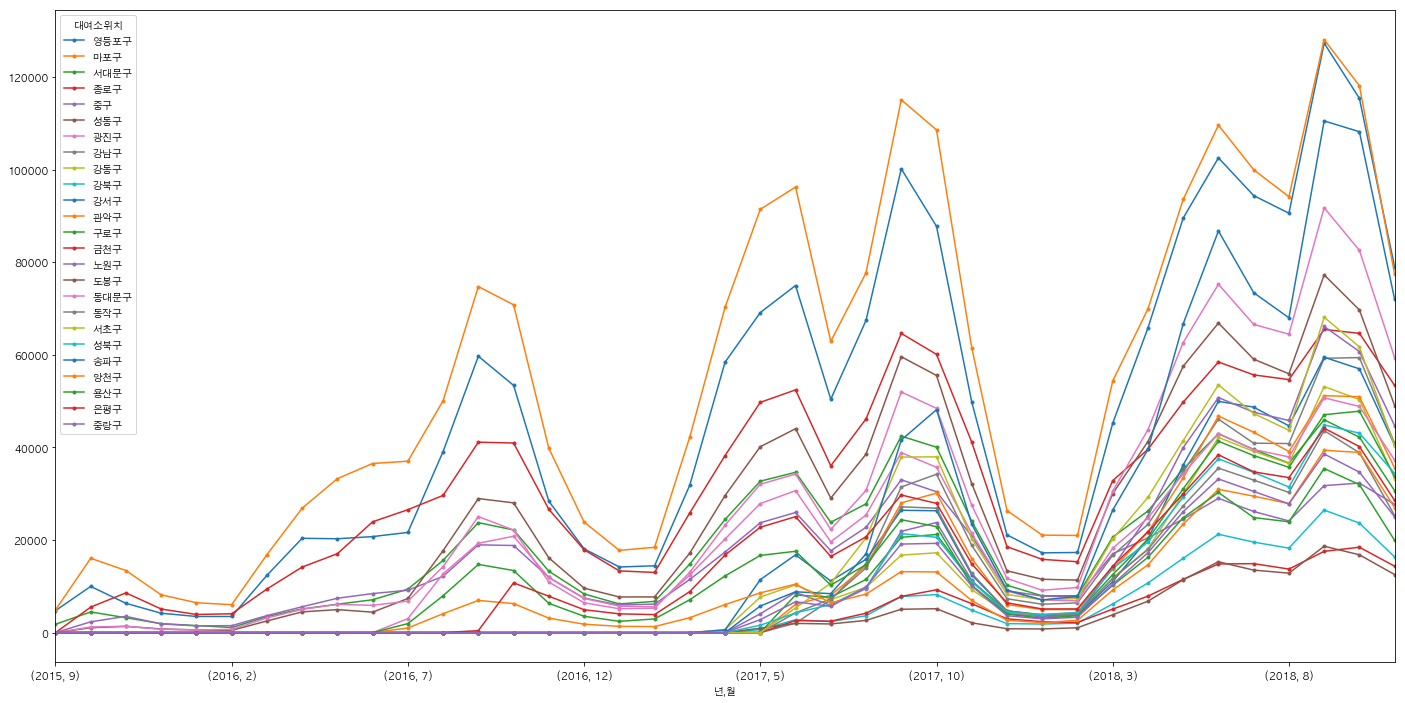

In [36]:
pvt_num_return.T.plot(style='.-', figsize=(24, 12))
plt.show()

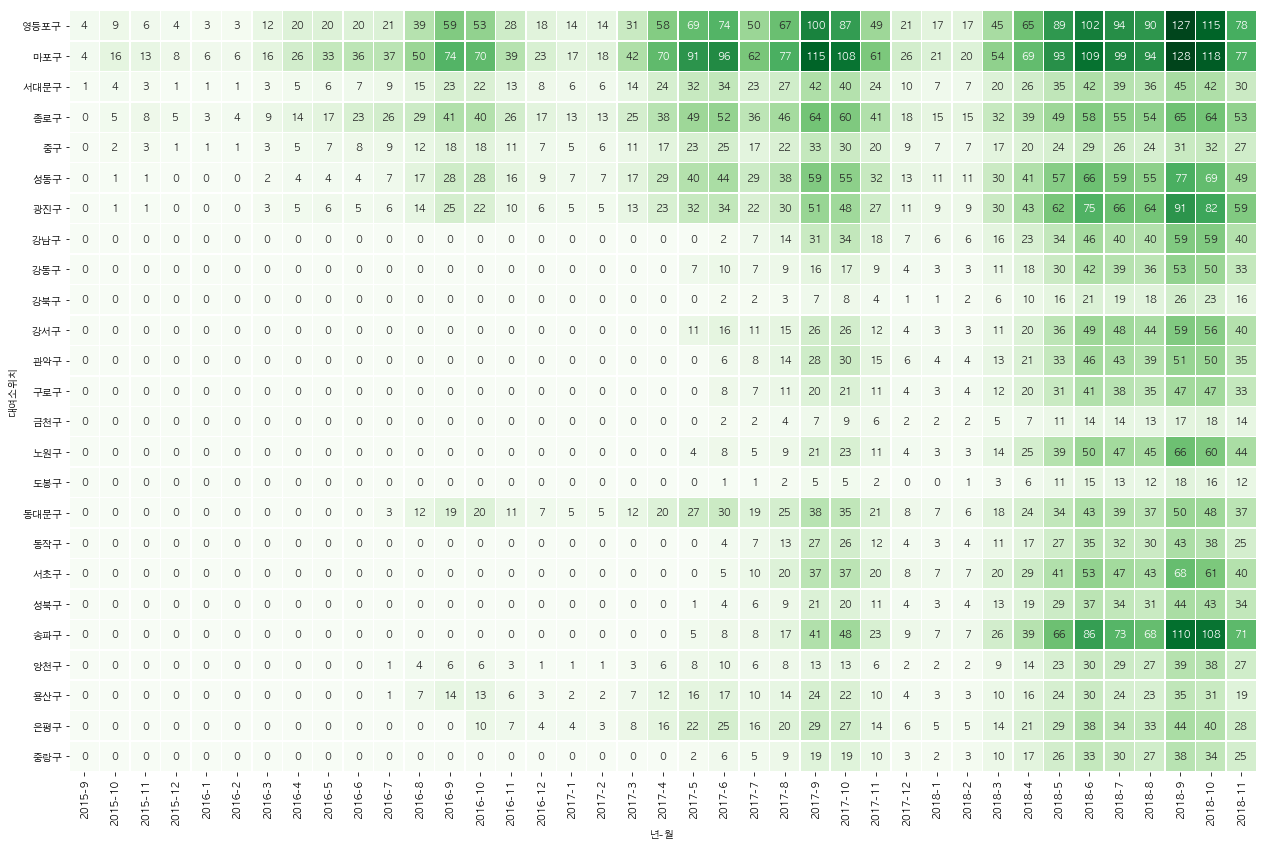

In [37]:
unit = 1000

plt.figure(figsize=(24, 14))
sns.heatmap((pvt_num_return/unit).astype('int'), square=True, cmap='Greens', linewidth=0.5, cbar=False, annot=True, fmt='d')
plt.show()

반납건수도 대여건수와 별 다르지 않다.

#### [해석]
- 모든 지역에 대여소가 점점 늘어나고 있고,
- 동시에, 모든 지역에서 이용률도 높아지고 있다.

#### 3. 대여소당 평균 이용률

사실 **지역별로 대여소 개수가 다르므로**, 지역간의 이용률을 올바르게 비교하려면, 대여소당 평균 이용률을 사용해야 한다.  
즉, `지역의 대여소 평균 이용률 = 지역의 대여건수의 합 / 지역의 대여소 개수` 를 고려한다.

In [38]:
pvt_use_ratio = (pvt_num_use / pvt_num_rental).fillna(0)
pvt_use_ratio = pvt_use_ratio.astype('int')
pvt_use_ratio = pvt_use_ratio.reindex(index=region_index)
pvt_use_ratio.head()

년     2015                2016                           ... 2018            \
월       9    10   11   12   1    2    3    4    5    6   ...   2    3    4    
대여소위치                                                    ...                  
영등포구   179  391  254  159  134  135  477  785  779  796  ...  256  653  905   
마포구    209  355  293  182  138  126  354  565  715  768  ...  290  766  958   
서대문구   161  373  262  141  122   89  257  386  487  612  ...  188  475  589   
종로구      0  212  326  188  146  151  330  517  602  517  ...  304  672  784   
중구       0  143  224  126   99   93  236  352  451  524  ...  234  528  644   

년                                               
월        5     6     7     8     9     10   11  
대여소위치                                           
영등포구   1225  1410  1309  1243  1638  1419  946  
마포구    1289  1517  1371  1287  1759  1548  980  
서대문구    775   960   863   804  1002   875  663  
종로구     948  1129  1073   971  1115  1067  859  
중구      772   954   876   820  1038   942  757  

[5 rows x 39 columns]

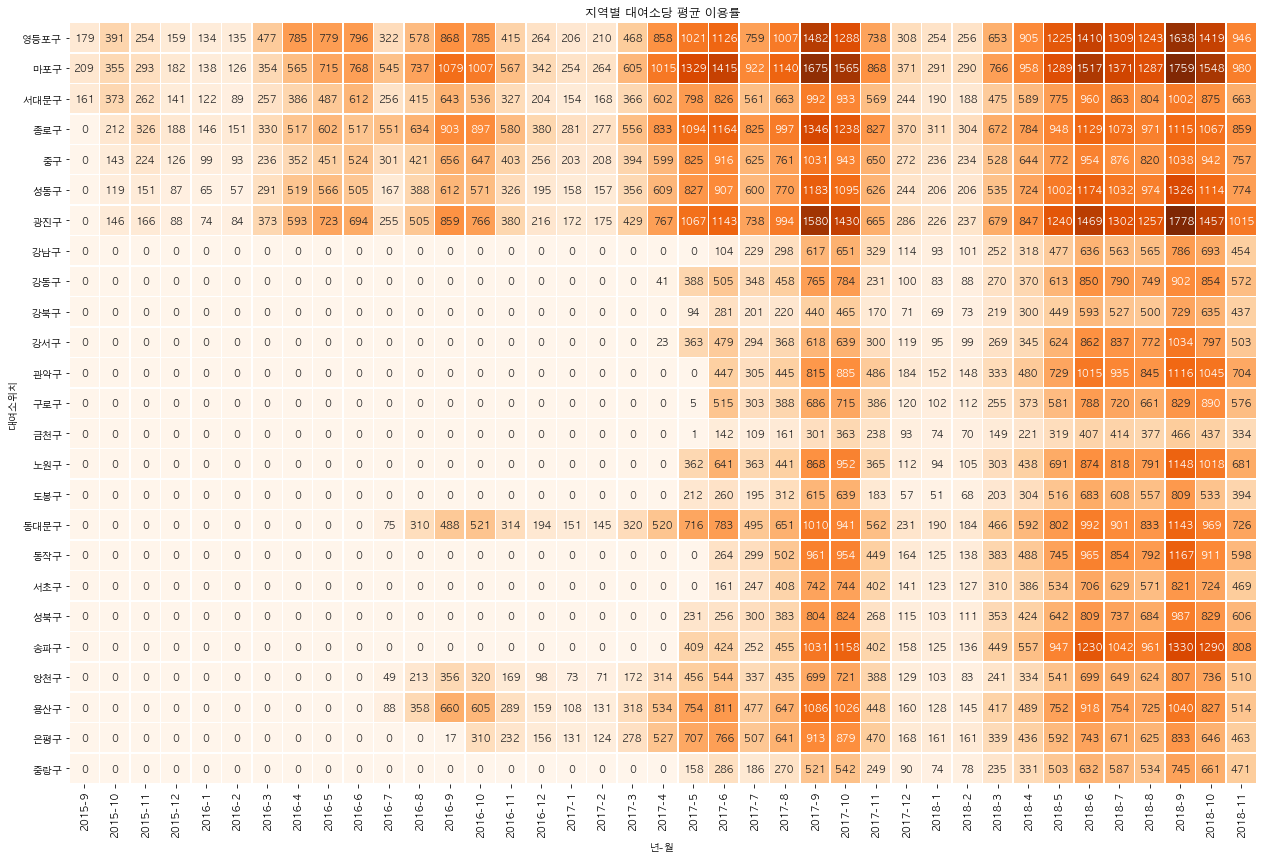

In [39]:
unit = 1

plt.figure(figsize=(24, 14))
sns.heatmap((pvt_use_ratio/unit).astype('int'), square=True, cmap='Oranges', linewidth=0.5, cbar=False, annot=True, fmt='d')
plt.title("지역별 대여소당 평균 이용률")
plt.show()

이제 다시, 지역별 사용률을 지도로 그려보자.  
비교적, 대여소가 어느정도 설치된 시점인 **17년 11월 - 18년 11월**을 기준으로 살펴보자.

먼저 시간대별로 살펴보면,

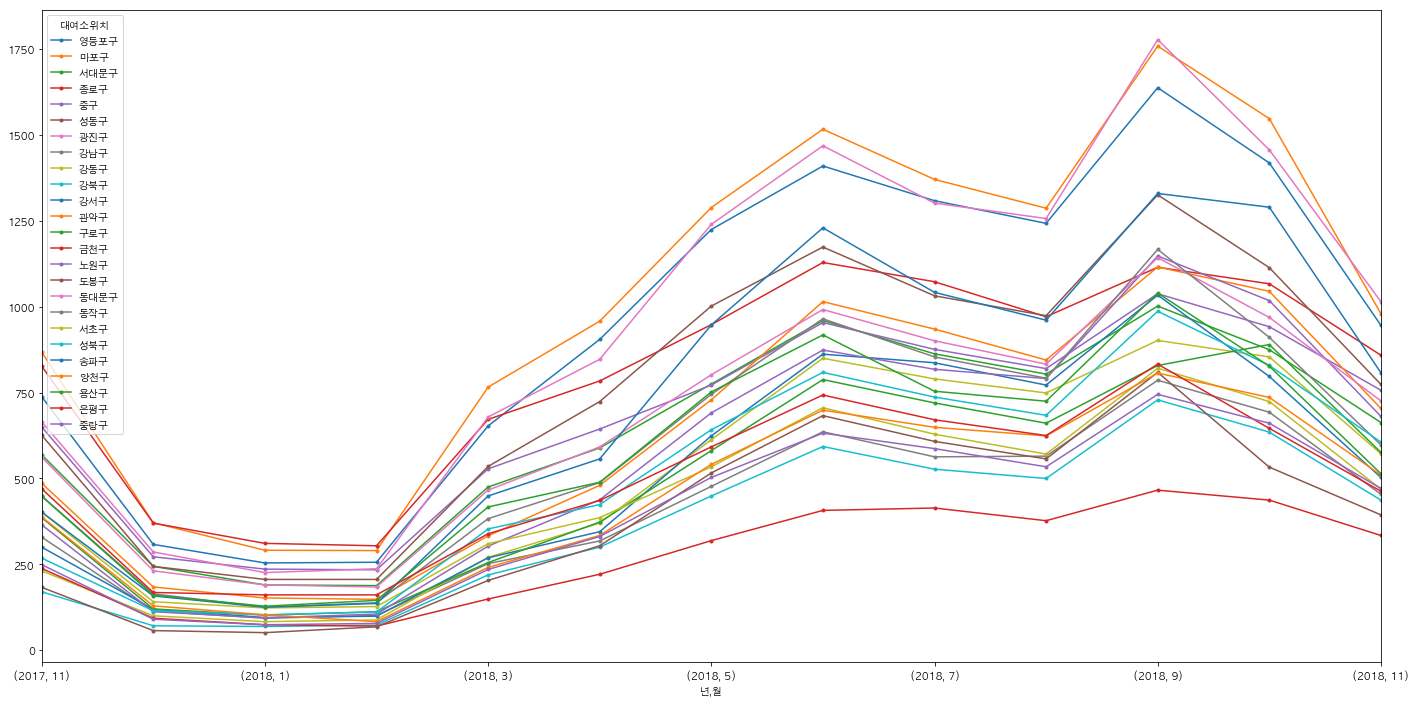

In [40]:
sum_use_ratio = pvt_use_ratio.T.loc[(2017, 11):(2018, 11)]
#sum_use_ratio.sort_values(ascending=False, inplace=True)
sum_use_ratio.plot(style='.-', figsize=(24, 12))
plt.show()

많이 이용하는 지역구 순위가 그렇게 크게 변동되지도 않고, 별다른 특이한 패턴을 보이지 않는다.  
이 기간동안의 각 지역별로 합산을 내면.

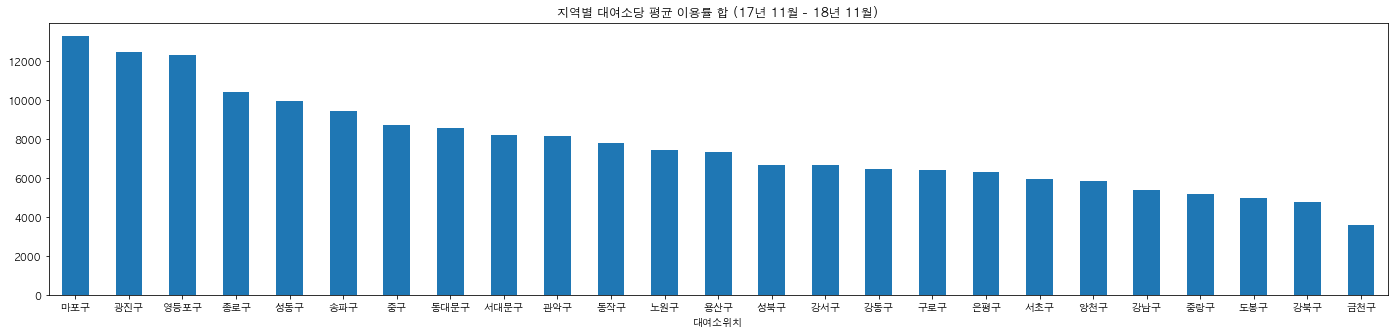

In [41]:
sum_use_ratio = pvt_use_ratio.T.loc[(2017, 11):(2018, 11)].T.sum(axis=1)
sum_use_ratio.sort_values(ascending=False, inplace=True)

sum_use_ratio.plot(kind='bar', figsize=(24, 5), rot=0, title="지역별 대여소당 평균 이용률 합 (17년 11월 - 18년 11월)")
plt.show()

위 수치를 다시 설명하자면, **설치된 대여소 대비 이용량**을 나타낸 것이다.  

#### [해석]
- 마포, 영등포는 꾸준하게 이용률이 높아왔고, **광진구**가 생각보다 높았다.
- 최근 집중적으로 대여소가 설치되던 강남, 송파, 서초 중, **송파를 제외한 나머지 지역은 생각보다 높지 않았다.**
  - 대여소가 많이 설치되도, 기대만큼 사람들이 잘 안타는 것일까?
  - 아니면 비교적 최근에 설치되어서, 아직 사람들이 잘 모르는 것일까?

이를 다시 지도로 그려보자.


In [42]:
bike_map = folium.Map(location=[37.541, 126.986], zoom_start=10.8)
folium.Choropleth(geo_data=geo_str,
                  data=sum_use_ratio,
                  key_on='feature.properties.SIG_KOR_NM', 
                  fill_color='Blues').add_to(bike_map)
bike_map

## 번외.

### 질문 1) 해당 지역에 자전거 대여소가 많아지면, 전체 이용률도 올라갈까?

전체 이용률이.. 자전거 대여소 수에만 영향받는게 아니기 때문에. 자전거 대여소 수 증가 -> 전체 이용률 수 증가 인지 알 수 없다.

### 질문 2) 당일 정류소당 대여건수를 예측해볼 수 있을까?

이거.. 해볼만 하다. 추후..